<a href="https://colab.research.google.com/github/parth05loya/PythonProjects/blob/main/Human_Factor_Study_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM

# Example dataframe
df = pd.read_excel("final eye tracker data.xlsx")  # Make sure your data is in long format

anova = AnovaRM(df, depvar='Number of Blinks', subject='Participant ID',
                within=['Scenario', 'Event']).fit()

print(anova)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<unknown>, line 1)

In [ ]:
import pandas as pd
from statsmodels.stats.anova import AnovaRM

# Load the Excel file
df = pd.read_excel("final eye tracker data.xlsx")


# Rename columns to remove spaces
df = df.rename(columns={
    'Participant ID': 'Participant_ID',
    'Number of Blinks': 'Blink_Count'
})

# Run repeated measures ANOVA
anova = AnovaRM(df, depvar='Blink_Count', subject='Participant_ID',
                within=['Scenario', 'Event']).fit()

print(anova)


                    Anova
               F Value Num DF  Den DF  Pr > F
---------------------------------------------
Scenario        0.2357 1.0000  19.0000 0.6329
Event           9.8144 6.0000 114.0000 0.0000
Scenario:Event  0.4611 6.0000 114.0000 0.8357



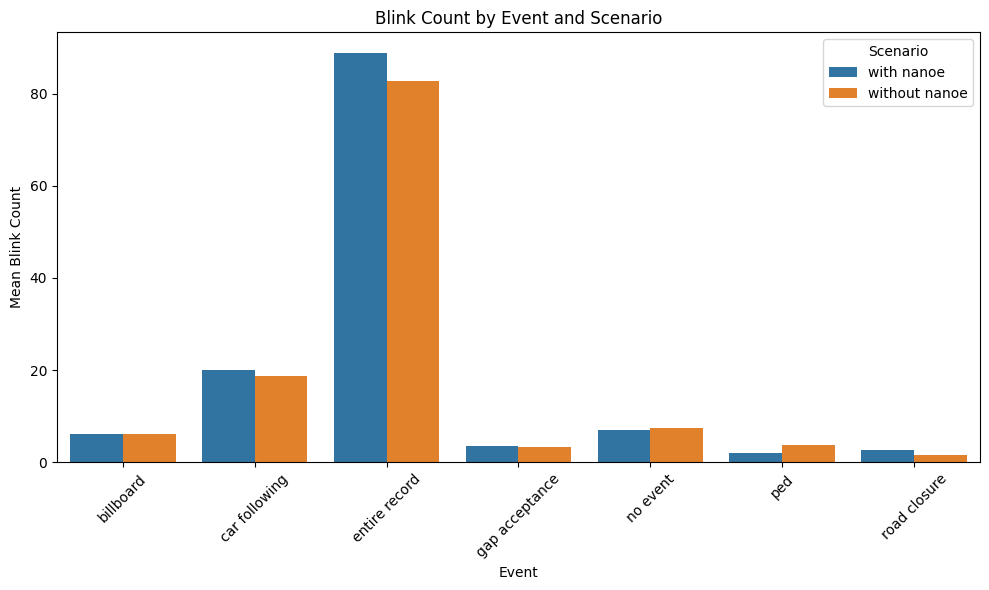

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate means for each Scenario × Event
summary = df.groupby(['Scenario', 'Event'])['Blink_Count'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=summary, x='Event', y='Blink_Count', hue='Scenario')
plt.title("Blink Count by Event and Scenario")
plt.ylabel("Mean Blink Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from statsmodels.stats.anova import AnovaRM

# Load the Excel file
df = pd.read_excel("final eye tracker data.xlsx")


# Rename columns to remove spaces
df = df.rename(columns={
    'Participant ID': 'Participant_ID',
    'Number of Fixations': 'Fixation_Count'
})

# Run repeated measures ANOVA
anova = AnovaRM(df, depvar='Fixation_Count', subject='Participant_ID',
                within=['Scenario', 'Event']).fit()

print(anova)


                    Anova
               F Value  Num DF  Den DF  Pr > F
----------------------------------------------
Scenario         1.0728 1.0000  19.0000 0.3133
Event          134.4676 6.0000 114.0000 0.0000
Scenario:Event   0.6858 6.0000 114.0000 0.6615



In [ ]:
import pandas as pd
from statsmodels.stats.anova import AnovaRM

# Load the Excel file
df = pd.read_excel("final eye tracker data.xlsx")


# Rename columns to remove spaces
df = df.rename(columns={
    'Participant ID': 'Participant_ID',
    'Average Fixation Duration (ms)': 'Fixation_Duration'
})

# Run repeated measures ANOVA
anova = AnovaRM(df, depvar='Fixation_Duration', subject='Participant_ID',
                within=['Scenario', 'Event']).fit()

print(anova)

                    Anova
               F Value Num DF  Den DF  Pr > F
---------------------------------------------
Scenario        0.9741 1.0000  19.0000 0.3361
Event          16.0565 6.0000 114.0000 0.0000
Scenario:Event  0.2178 6.0000 114.0000 0.9704



In [ ]:
from scipy.stats import ttest_rel

events = df['Event'].unique()

df = df.rename(columns={
    'Participant ID': 'Participant_ID',
    'Number of Blinks': 'Blink_Count'
})

for event in events:
    df_event = df[df['Event'] == event]

    with_nanoe = df_event[df_event['Scenario'] == 'with nanoe']['Blink_Count'].values
    without_nanoe = df_event[df_event['Scenario'] == 'without nanoe']['Blink_Count'].values

    t_stat, p_val = ttest_rel(with_nanoe, without_nanoe)
    print(f"{event}: t = {t_stat:.3f}, p = {p_val:.3f}")


billboard: t = 0.236, p = 0.816
car following: t = 0.443, p = 0.663
entire record: t = 0.640, p = 0.530
gap acceptance: t = 0.094, p = 0.926
no event: t = -0.135, p = 0.894
ped: t = -1.663, p = 0.113
road closure: t = 1.444, p = 0.165


In [ ]:
from scipy.stats import ttest_rel

events = df['Event'].unique()

df = df.rename(columns={
    'Participant ID': 'Participant_ID',
    'Number of Fixations': 'Fixations_Count'
})

for event in events:
    df_event = df[df['Event'] == event]

    with_nanoe = df_event[df_event['Scenario'] == 'with nanoe']['Fixations_Count'].values
    without_nanoe = df_event[df_event['Scenario'] == 'without nanoe']['Fixations_Count'].values

    t_stat, p_val = ttest_rel(with_nanoe, without_nanoe)
    print(f"{event}: t = {t_stat:.3f}, p = {p_val:.3f}")


billboard: t = -0.435, p = 0.669
car following: t = -1.449, p = 0.164
entire record: t = -0.849, p = 0.406
gap acceptance: t = 0.391, p = 0.700
no event: t = -0.456, p = 0.653
ped: t = -1.959, p = 0.065
road closure: t = -0.363, p = 0.721


In [ ]:
from scipy.stats import ttest_rel

events = df['Event'].unique()

df = df.rename(columns={
    'Participant ID': 'Participant_ID',
    'Average Fixation Duration (ms)': 'average_fixation_duration'
})

for event in events:
    df_event = df[df['Event'] == event]

    with_nanoe = df_event[df_event['Scenario'] == 'with nanoe']['average_fixation_duration'].values
    without_nanoe = df_event[df_event['Scenario'] == 'without nanoe']['average_fixation_duration'].values

    t_stat, p_val = ttest_rel(with_nanoe, without_nanoe)
    print(f"{event}: t = {t_stat:.3f}, p = {p_val:.3f}")


KeyError: 'average_fixation_duration'

In [ ]:
from scipy.stats import ttest_rel
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM

# Example dataframe
df = pd.read_excel("final eye tracker data.xlsx")

# Standardize naming
df = df.rename(columns={
    'Participant ID': 'Participant_ID',
    'Average Fixation Duration (ms)': 'Fixations_Duration'
})

events = df['Event'].unique()

print("Event-wise Paired t-test Results (Fixation Duration):\n")

for event in events:
    df_event = df[df['Event'] == event]

    # Pivot to make sure both values are aligned by Participant_ID
    pivot_df = df_event.pivot(index='Participant_ID', columns='Scenario', values='Fixations_Duration')

    # Drop rows with missing values (participants with incomplete data for this event)
    pivot_df = pivot_df.dropna()

    if pivot_df.shape[0] == 0:
        print(f"{event}: Skipped (no complete data)")
        continue

    with_nanoe = pivot_df['with nanoe']
    without_nanoe = pivot_df['without nanoe']

    t_stat, p_val = ttest_rel(with_nanoe, without_nanoe)
    print(f"{event}: t = {t_stat:.3f}, p = {p_val:.3f}, N = {pivot_df.shape[0]}")


Event-wise Paired t-test Results (Fixation Duration):

billboard: t = 0.609, p = 0.550, N = 20
car following: t = 0.509, p = 0.617, N = 20
entire record: t = 0.381, p = 0.708, N = 20
gap acceptance: t = -0.670, p = 0.511, N = 20
no event: t = 0.097, p = 0.924, N = 20
ped: t = 0.848, p = 0.407, N = 20
road closure: t = 0.659, p = 0.518, N = 20


In [ ]:
import pandas as pd
from scipy.stats import ttest_rel
import numpy as np

# Rename columns for clean access
df = df.rename(columns={
    'Participant ID': 'Participant_ID',
    'Number of Blinks': 'Blinks',
    'Number of Fixations': 'Fixations',
    'Average Fixation Duration (ms)': 'Fixation_Duration'
})

# Metrics to analyze
metrics = {
    'Blinks': 'Number of Blinks',
    'Fixation_Duration': 'Average Fixation Duration (ms)',
    'Fixations': 'Number of Fixations'
}

# Function to calculate Cohen's d
def cohen_d(x, y):
    diff = x - y
    return diff.mean() / diff.std(ddof=1)

# Get all event types
events = df['Event'].unique()

# Initialize results storage
results = []

for event in events:
    df_event = df[df['Event'] == event]

    for metric, label in metrics.items():
        # Create paired data pivot
        pivot_df = df_event.pivot(index='Participant_ID', columns='Scenario', values=metric)
        pivot_df = pivot_df.dropna()

        if pivot_df.shape[0] == 0:
            continue

        x = pivot_df['with nanoe']
        y = pivot_df['without nanoe']

        t_stat, p_val = ttest_rel(x, y)
        d = cohen_d(x, y)

        results.append({
            'Event': event,
            'Measure': label,
            'N': len(x),
            't': round(t_stat, 3),
            'p': round(p_val, 4),
            "Cohen's d": round(d, 3)
        })

# Convert to DataFrame and display
results_df = pd.DataFrame(results)
results_df = results_df[['Event', 'Measure', 'N', 't', 'p', "Cohen's d"]]

import ace_tools as tools; tools.display_dataframe_to_user(name="Event-wise Paired t-Test Results", dataframe=results_df)


KeyError: 'Fixation_Duration'

In [ ]:
import pandas as pd
from scipy.stats import ttest_rel
import numpy as np

# Rename columns to avoid spaces and make analysis easier
df = df.rename(columns={
    'Participant ID': 'Participant_ID',
    'Number of Blinks': 'Blinks',
    'Number of Fixations': 'Fixations',
    'Average Fixation Duration (ms)': 'Fixations_Duration'
})

# Define all actual column names (internal) and pretty labels (for display)
metrics = {
    'Blinks': 'Number of Blinks',
    'Fixations': 'Number of Fixations',
    'Fixations_Duration': 'Average Fixation Duration (ms)'
}

# Cohen's d function for paired data
def cohen_d(x, y):
    diff = x - y
    return diff.mean() / diff.std(ddof=1)

# Get unique events
events = df['Event'].unique()

# Store results
results = []

for event in events:
    df_event = df[df['Event'] == event]

    for metric_col, display_name in metrics.items():
        # Pivot data for paired test
        pivot_df = df_event.pivot(index='Participant_ID', columns='Scenario', values=metric_col)
        pivot_df = pivot_df.dropna()

        if pivot_df.shape[0] == 0:
            continue

        with_nanoe = pivot_df['with nanoe']
        without_nanoe = pivot_df['without nanoe']

        t_stat, p_val = ttest_rel(with_nanoe, without_nanoe)
        d = cohen_d(with_nanoe, without_nanoe)

        results.append({
            'Event': event,
            'Measure': display_name,
            'N': len(with_nanoe),
            't': round(t_stat, 3),
            'p': round(p_val, 4),
            "Cohen's d": round(d, 3)
        })

# Convert to DataFrame and display
results_df = pd.DataFrame(results)
results_df = results_df[['Event', 'Measure', 'N', 't', 'p', "Cohen's d"]]

print(results_df)


             Event                         Measure   N      t       p  \
0        billboard                Number of Blinks  20  0.236  0.8161   
1        billboard             Number of Fixations  20 -0.435  0.6687   
2        billboard  Average Fixation Duration (ms)  20  0.609  0.5499   
3    car following                Number of Blinks  20  0.443  0.6628   
4    car following             Number of Fixations  20 -1.449  0.1636   
5    car following  Average Fixation Duration (ms)  20  0.509  0.6169   
6    entire record                Number of Blinks  20  0.640  0.5297   
7    entire record             Number of Fixations  20 -0.849  0.4063   
8    entire record  Average Fixation Duration (ms)  20  0.381  0.7076   
9   gap acceptance                Number of Blinks  20  0.094  0.9257   
10  gap acceptance             Number of Fixations  20  0.391  0.7004   
11  gap acceptance  Average Fixation Duration (ms)  20 -0.670  0.5108   
12        no event                Number of Blinks 

In [ ]:
df.columns = df.columns.str.strip()  # remove leading/trailing whitespace

df = df.rename(columns={
    'Participant ID': 'Participant_ID',
    'Number of Blinks': 'Blinks',
    'Number of Fixations': 'Fixations',
    'Average Fixation Duration (ms)': 'Fixation_Duration'
})
print(df.columns.tolist())


['Participant_ID', 'Scenario', 'Event', 'Blinks', 'Fixations', 'Fixations_Duration']


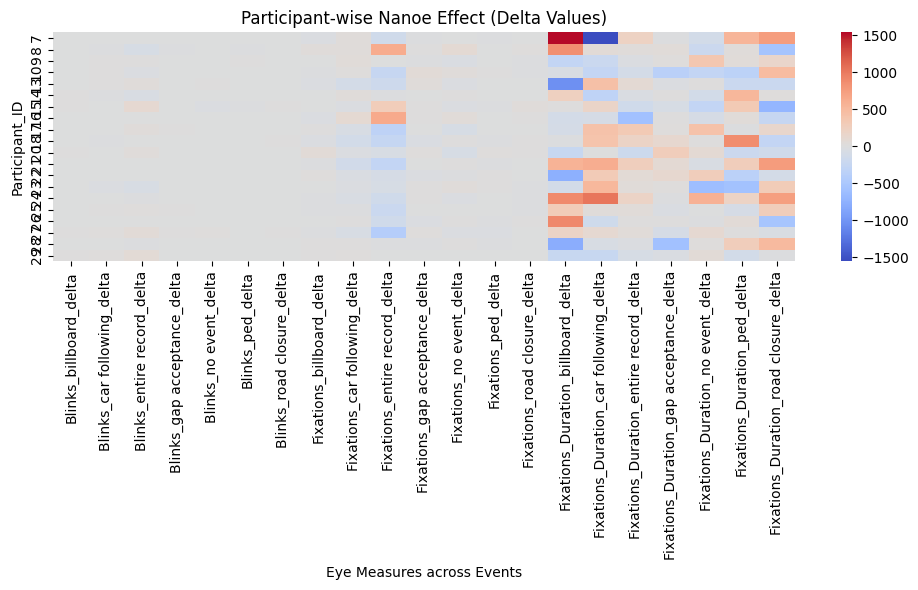

Scenario,Participant_ID,Cluster
0,7,1
1,8,0
2,9,1
3,10,0
4,13,1
5,14,0
6,15,0
7,16,0
8,17,1
9,18,1


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Clean column names if needed (as before)
df = df.rename(columns={
    'Participant ID': 'Participant_ID',
    'Number of Blinks': 'Blinks',
    'Number of Fixations': 'Fixations',
    'Average Fixation Duration (ms)': 'Fixations_Duration'
})

# Step 2: Choose metrics to cluster on
metrics = ['Blinks', 'Fixations', 'Fixations_Duration']
events = df['Event'].unique()

# Step 3: Create delta (difference) features
features = []

for metric in metrics:
    for event in events:
        df_event = df[df['Event'] == event]
        pivot_df = df_event.pivot(index='Participant_ID', columns='Scenario', values=metric)
        pivot_df = pivot_df.dropna()
        pivot_df[f'{metric}_{event}_delta'] = pivot_df['with nanoe'] - pivot_df['without nanoe']
        pivot_df = pivot_df[[f'{metric}_{event}_delta']].reset_index()
        features.append(pivot_df)

# Step 4: Merge all delta columns
from functools import reduce
df_delta = reduce(lambda left, right: pd.merge(left, right, on='Participant_ID', how='outer'), features)
df_delta = df_delta.dropna()  # drop rows with missing deltas

# Step 5: Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_delta.drop(columns='Participant_ID'))

# Step 6: KMeans Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df_delta['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 7: Visualize
plt.figure(figsize=(10, 6))
sns.heatmap(df_delta.set_index('Participant_ID').drop(columns='Cluster'), cmap='coolwarm', center=0)
plt.title("Participant-wise Nanoe Effect (Delta Values)")
plt.xlabel("Eye Measures across Events")
plt.tight_layout()
plt.show()

# Show cluster assignment
cluster_table = df_delta[['Participant_ID', 'Cluster']]
display(cluster_table)


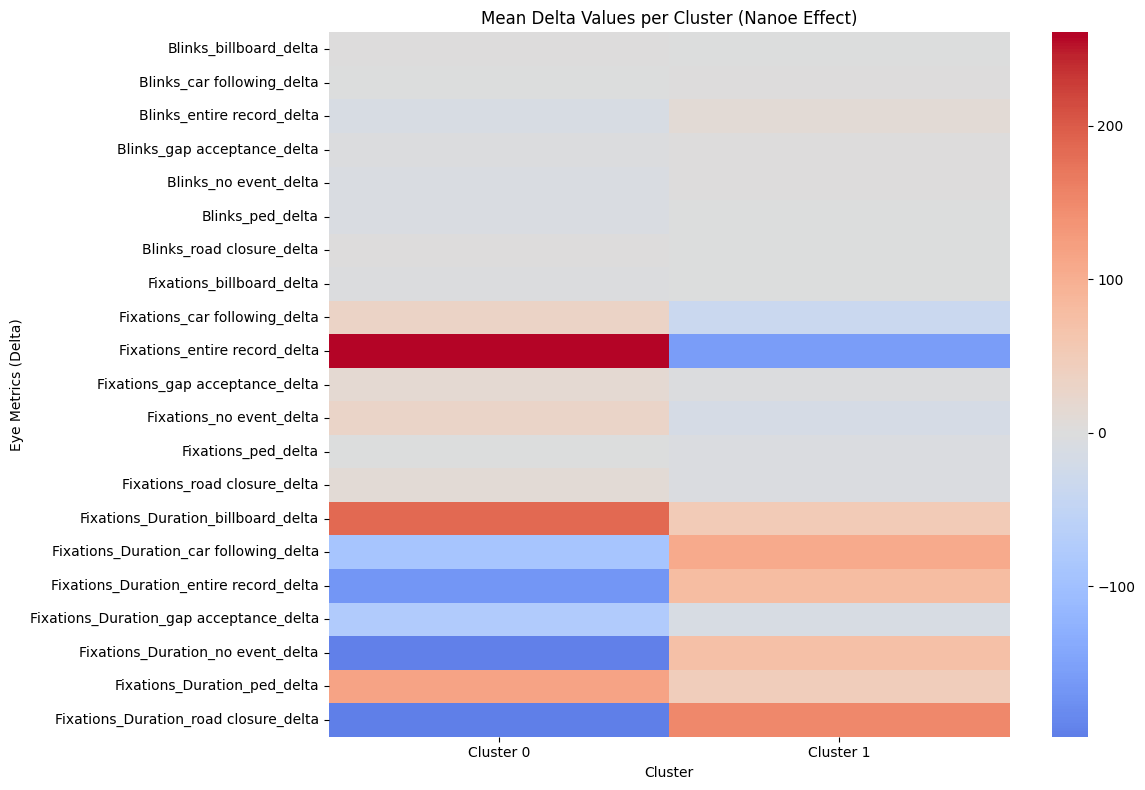

In [ ]:
# Remove cluster column from feature matrix
delta_only = df_delta.drop(columns=['Cluster', 'Participant_ID'])

# Add cluster labels back for grouping
df_delta_grouped = pd.concat([df_delta[['Cluster']], delta_only], axis=1)

# Compute mean deltas per cluster
cluster_means = df_delta_grouped.groupby('Cluster').mean().T
cluster_means.columns = [f'Cluster {c}' for c in cluster_means.columns]

# Optional: highlight differences
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means, cmap='coolwarm', center=0)
plt.title("Mean Delta Values per Cluster (Nanoe Effect)")
plt.xlabel("Cluster")
plt.ylabel("Eye Metrics (Delta)")
plt.tight_layout()
plt.show()


In [ ]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())


NameError: name 'pca' is not defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Explained variance already computed
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(explained_var) + 1), explained_var, marker='o', label='Individual Variance')
plt.plot(np.arange(1, len(cumulative_var) + 1), cumulative_var, marker='s', label='Cumulative Variance')
plt.axhline(y=0.1, color='gray', linestyle='--', label='10% Threshold')
plt.title('PCA Scree Plot: Variance Explained by Each Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'explained_var' is not defined

<Figure size 800x500 with 0 Axes>